<h2 style='color:blue'>Small Image Classification Using Simple Aritifical Neural Network: GPU Benchmarking</h2>

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
# Version Information
# tensorflow 2.2.0 , Cudnn7.6.5 and Cuda 10.1 , python 3.8

**This command shows list of physical devices available for tensorflow. You can see GPU listed here. If you have NVIDIA GPU you need to install CUDA toolkit and cuDNN as per instruction on this webpage. Without proper installation you will not see GPU in list of devices**

https://shawnhymel.com/1961/how-to-install-tensorflow-with-gpu-support-on-windows/

In [2]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
tf.__version__

'2.18.0'

In [4]:
tf.test.is_built_with_cuda()

True

<h4 style="color:purple">Load the dataset</h4>

Our dataset contains 60000 small training images that belongs to one of the below 10 classes

<img src="https://github.com/codebasics/deep-learning-keras-tf-tutorial/blob/master/10_gpu_benchmarking/small_images.jpg?raw=1" />

In [5]:
(X_train, y_train), (X_test,y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [6]:
X_train.shape

(50000, 32, 32, 3)

In [7]:
y_train.shape

(50000, 1)

<h4 style="color:purple">Data Visualization</h4>

In [30]:
def plot_sample(index):
    plt.figure(figsize = (10,1))
    plt.imshow(X_train[index])

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
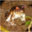

In [49]:
X_train[0]

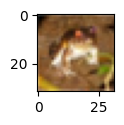

In [31]:
plot_sample(0)

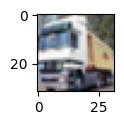

In [32]:
plot_sample(1)

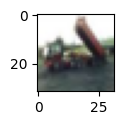

In [25]:
plot_sample(2)

In [35]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

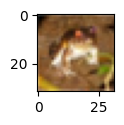

In [53]:
plot_sample(0)

In [55]:
classes[y_train[0][0]]

'frog'

In [43]:
y_train[:3]

array([[6],
       [9],
       [9]], dtype=uint8)

In [44]:
y_test.shape

(10000, 1)

In [45]:
X_train.shape

(50000, 32, 32, 3)

<h4 style="color:purple">Preprocessing: Scale images</h4>

In [46]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [51]:
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes=10
)
y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes=10
)

In [52]:
print(y_train[0])  # Example: 3 (original label)
print(y_train_categorical[0])  # One-hot encoded output


[6]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [ ]:
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
y_train_categorical[0:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

<h4 style="color:purple">Model building and training</h4>

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical



# Define the CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
    BatchNormalization(),
    Conv2D(32, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),

    Conv2D(64, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),

    Conv2D(128, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(128, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.4),

    Flatten(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')  # 10 classes
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train_categorical, epochs=30, batch_size=64, validation_data=(X_test_scaled, y_test_categorical))


In [87]:
# Evaluate model
test_loss, test_acc = model.evaluate(X_test_scaled, y_test_categorical)
print(f"\nTest Accuracy: {test_acc * 100:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8605 - loss: 0.4615

Test Accuracy: 86.10%


<h4 style="color:purple">Let's make some predictions</h4>

In [88]:
classes[np.argmax(model.predict(X_test_scaled)[30])]

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step


'frog'

In [89]:
classes[y_test[30][0]]

'frog'